# «Статистическая проверка гипотез для связанных выборок. A/B тесты и как их проводить»

#### 1. Вам даны результаты проверки двух препаратов. Требуется оценить, есть ли различие в эффекте у этих пациентов.

A - результаты для выборки людей получающих препарат А.

B - результаты для другой выборки людей, получающих препарат B.

In [13]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

In [24]:
np.random.seed(11)
A=stats.norm.rvs(scale=30,loc=11,size=100)
B=A+stats.norm.rvs(scale=54,loc=11,size=100)

In [25]:
stats.ttest_ind(A, B)

Ttest_indResult(statistic=-1.733800647210997, pvalue=0.08451003973499756)

Независимые выборки. Если берем pvalue для подтверждения альтернативной гипотезы = 5%, то нельзя сказать, что есть значимое различие в эффекте у двух групп пациентов, т.к. фактическое pvalue = 8%

#### 2. Вам даны результаты проверки двух препаратов. Требуется оценить, есть ли различие в эффекте у этих пациентов.

А - те же люди, но без препарата.

B - выборка получающая препарат B

In [10]:
np.random.seed(11)
A=stats.norm.rvs(scale=30,loc=11,size=100)
B=A+stats.norm.rvs(scale=54,loc=11,size=100)

In [21]:
stats.wilcoxon(A, B)

WilcoxonResult(statistic=1930.0, pvalue=0.04077572901549266)

Выборки зависимые, используем критерий Уилкоксона. Есть значимое различие в эффекте, т.к. фактическое pvalue = 4%

#### 3. Допустим вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы водой с удобнением, третью группу огурцов будем поливать минералкой. Используя дисперсионный ананлиз, сделайте выводы о распредлениях результатов. Если ли эффект от удобрения по сравнению с минералкой? 

In [28]:
water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]

nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]

mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

In [29]:
stats.f_oneway(water, nutri, mineral)

F_onewayResult(statistic=12.525963044834192, pvalue=2.9240047906326866e-05)

Т.к. pvalue < 5% можно сказать, что группы отличаются друг от друга, т.е. поливание удобрением и минералкой даёт эффект.

In [31]:
stats.f_oneway(nutri, mineral)

F_onewayResult(statistic=18.128724672228838, pvalue=0.0001213673340124552)

Есть эффект от удобрения по сравнению с минералкой.

# Cookie Cats

In [33]:
data = pd.read_csv('cookie_cats.csv')
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [34]:
#Сгрупируем результаты теста по версиям игры.
data.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


In [35]:
44700 / 45489

0.9826551473982721

Выборки примерно одинаковые, отличаются всего на 2%

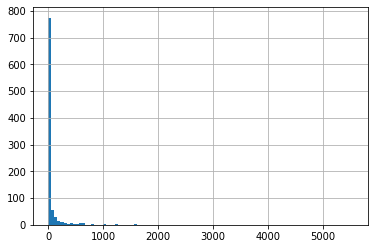

In [48]:
# Подсчет количества игроков для каждого количества раундов
plot_df = data.groupby('sum_gamerounds')['userid'].count()
plot_df.hist(bins=100)

Подавляющее число игроков задерживается в игре лишь на небольшое число раундов.
Однако есть небольшое количество игроков, которые играют очень много раз (более 1000).

Text(0.5, 0, '# Game rounds')

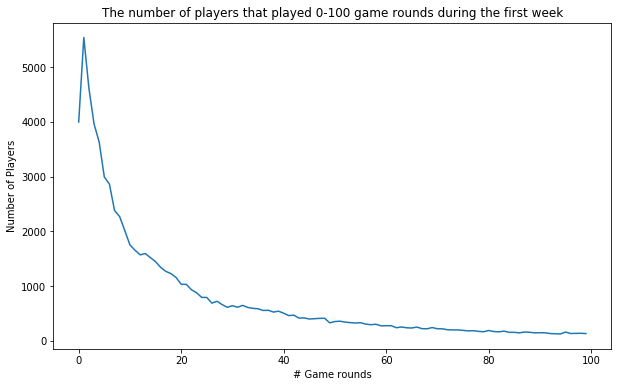

In [49]:
# Построим график распределения игроков, сыгравших от 0 до 100 игровых раундов в течение своей первой недели игры.
%matplotlib inline

ax = plot_df[:100].plot(figsize=(10,6))
ax.set_title("The number of players that played 0-100 game rounds during the first week")
ax.set_ylabel("Number of Players")
ax.set_xlabel('# Game rounds')

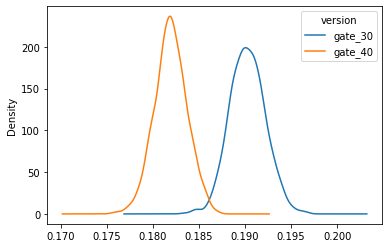

In [78]:
# Creating an list with bootstrapped means for each AB-group
boot_1d = []
for i in range(1000):
    boot_mean = data.sample(frac = 1,replace = True).groupby('version')['retention_7'].mean()  #retention_1
    boot_1d.append(boot_mean)
    
# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)
    
# A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot(kind='density')

На графике видно, что игроки, у которых был установлен порог в 30 уровней, возвращались в игру через 7 дней в среднем на 1 процентный пункт чаще, чем игроки с порогом в 40 уровней.

In [90]:
stats.ttest_ind(boot_1d['gate_30'], boot_1d['gate_40'])

Ttest_indResult(statistic=101.51759505182028, pvalue=0.0)

In [ ]:
Распределения являются полностью отличающимися.